In [1]:
from typing import Optional, List, Dict, Tuple, Union

import numpy  as np
import pandas as pd

import seaborn as sns
from   scipy.stats import norm

import matplotlib.pyplot as plt
from   matplotlib.axes   import Axes
from   matplotlib.figure import Figure

1. [Customer Churn](https://www.kaggle.com/datasets/barun2104/telecom-churn) - набор данных содержит информацию о клиентах телекоммуникационной компании.
2. [US Cost of Living Dataset](https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties) - набор данных содержит информацию о стоимости жизни в различных округах США на основе калькулятора семейного бюджета Института экономической политики (EPI).

In [3]:
data_1 = pd.read_csv('data/telecom_churn.csv')
data_2 = pd.read_csv('data/cost_of_living_us.csv')

Рассмотрим признаки DayMins и DayCalls из датасета telecom_churn. И признаки housing_cost и food_cost из датасета US Cost of Living Dataset.

In [8]:
def plot_multiple_histograms(
    data_1: pd.DataFrame,
    data_2: pd.DataFrame,
    figsize: tuple[int, int] = (12, 8),
    bins: int = 20,
    color: str = 'b',
    kde: bool = True
) -> tuple[Figure, Axes]:
    """
    Description:
        Создает сетку из четырех гистограмм для визуализации распределения
        различных показателей из двух датафреймов.

    Args:
        data_1: Первый датафрейм, содержащий колонки 'DayCalls' и 'DayMins'
        data_2: Второй датафрейм, содержащий колонки 'housing_cost' и 'food_cost'
        figsize: Размер графика в дюймах (ширина, высота)
        bins: Количество интервалов для построения гистограммы
        color: Цвет гистограмм
        kde: Флаг отображения кривой плотности распределения

    Returns:
        Кортеж, содержащий объекты Figure и Axes matplotlib

    Raises:
        KeyError: Если в датафреймах отсутствуют необходимые колонки
        ValueError: Если переданы некорректные параметры визуализации

    Examples:
        >>> fig, axes = plot_multiple_histograms(
        ...     data_1=df1,
        ...     data_2=df2,
        ...     figsize=(12, 8),
        ...     bins=20,
        ...     color='y',
        ...     kde=True
        ... )
    """
    # Проверка наличия необходимых колонок
    required_cols_1 = ['DayCalls', 'DayMins']
    required_cols_2 = ['housing_cost', 'food_cost']
    
    if not all(col in data_1.columns for col in required_cols_1):
        raise KeyError(f"Датафрейм data_1 должен содержать колонки: {required_cols_1}")
    
    if not all(col in data_2.columns for col in required_cols_2):
        raise KeyError(f"Датафрейм data_2 должен содержать колонки: {required_cols_2}")

    # Создание сетки графиков
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    plt.tight_layout(pad=2., w_pad=5., h_pad=5.)

    # Построение гистограмм
    sns.histplot(
        data=data_1['DayCalls'],
        kde=kde,
        bins=bins,
        ax=axes[0, 0],
        color=color
    )
    axes[0, 0].set_title('Распределение количества звонков в день')

    sns.histplot(
        data=data_1['DayMins'],
        kde=kde,
        bins=bins,
        ax=axes[0, 1],
        color=color
    )
    axes[0, 1].set_title('Распределение длительности звонков')

    sns.histplot(
        data=data_2['housing_cost'],
        kde=kde,
        bins=bins,
        ax=axes[1, 0],
        color=color
    )
    axes[1, 0].set_title('Распределение затрат на жилье')

    sns.histplot(
        data=data_2['food_cost'],
        kde=kde,
        bins=bins,
        ax=axes[1, 1],
        color=color
    )
    axes[1, 1].set_title('Распределение затрат на питание')

    return fig, axes

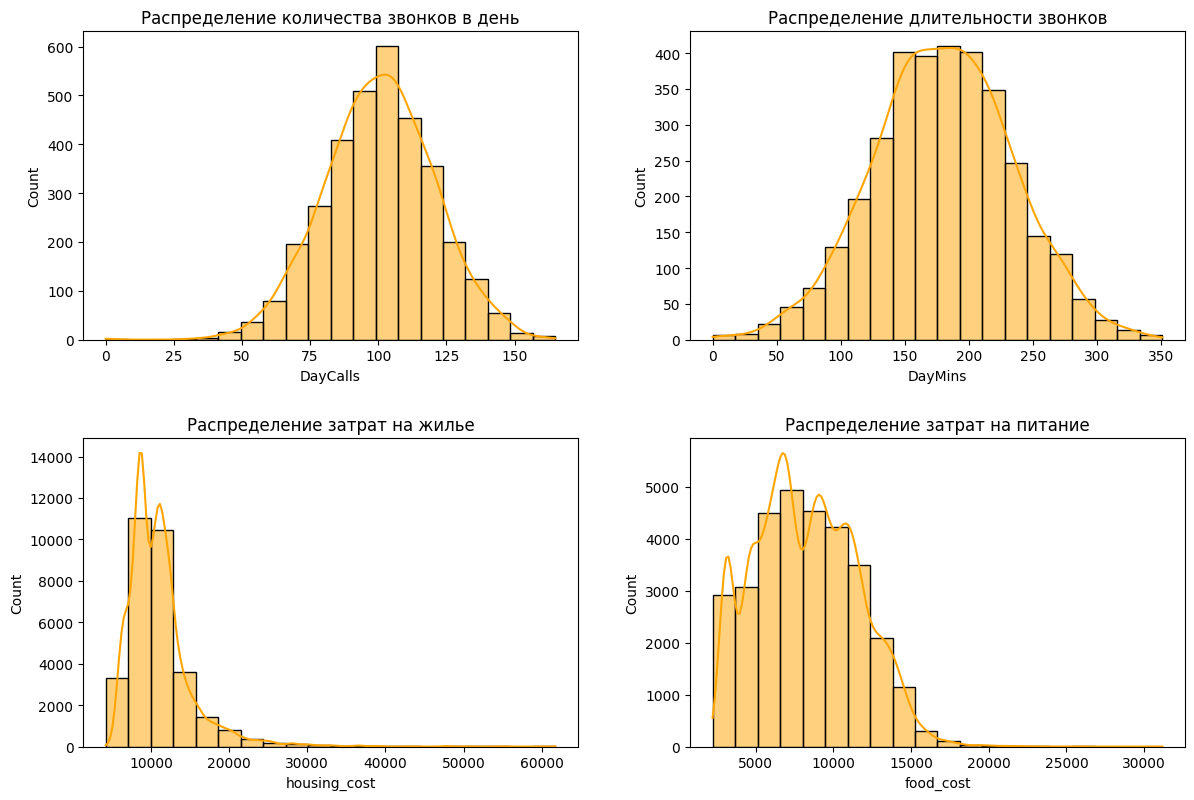

In [32]:
fig, axes = plot_multiple_histograms(
    data_1=data_1,
    data_2=data_2,
    figsize=(12, 8),
    bins=20,
    color='orange',
    kde=True
)

Посчитаем в данных распределениях:
*	мат.ожидание;
*	2-й (дисперсию) (**), 3-й (асимметрию) и 4-й (эксцесс) моменты; 
*	квантили уровня 0,05 и 0,95;
*   2,5%-ную точку для найденной случайной величины. 

In [21]:
def calculate_descriptive_statistics(
    datasets: List[pd.DataFrame],
    columns_per_dataset: List[List[str]],
    statistics: Optional[Dict[str, Union[str, callable]]] = None,
    quantiles: Optional[List[float]] = None
) -> pd.DataFrame:
    """
    Description:
    Вычисляет описательные статистики для указанных колонок в нескольких датафреймах
    и объединяет результаты в единую таблицу.
    CopyArgs:
        datasets: Список датафреймов для анализа
        columns_per_dataset: Список списков имен колонок для каждого датафрейма
        statistics: Словарь статистик для расчета. Ключи - названия статистик,
                значения - названия методов pandas или функции
        quantiles: Список квантилей для расчета (значения от 0 до 1)

    Returns:
        DataFrame с рассчитанными статистиками

    Raises:
        ValueError: Если количество наборов колонок не соответствует количеству датафреймов
        KeyError: Если указанные колонки отсутствуют в датафреймах
        TypeError: Если входные данные имеют неправильный тип

    Examples:
        >>> stats = calculate_descriptive_statistics(
        ...     datasets=[data_1, data_2],
        ...     columns_per_dataset=[['DayCalls', 'DayMins'], ['housing_cost', 'food_cost']],
        ...     statistics={'mean': 'mean', 'std': 'std', 'skewness': 'skew'},
        ...     quantiles=[0.025, 0.05, 0.95]
        ... )
    """
    # Установка статистик по умолчанию, если не указаны
    if statistics is None:
        statistics = ['mean', 'std', 'skew', 'kurt']

    # Установка квантилей по умолчанию, если не указаны
    if quantiles is None:
        quantiles = [0.025, 0.05, 0.95]

    # Словарь для преобразования имен статистик
    stat_names = {
        'mean': 'mean',
        'std': 'std',
        'skew': 'skewness',
        'kurt': 'kurtosis'
    }

    # Список для хранения результатов
    all_stats = []

    # Обработка каждого датафрейма и его колонок
    for df, cols in zip(datasets, columns_per_dataset):
        for col in cols:
            # Словарь для хранения статистик текущей колонки
            col_stats = {'Column': col}
            
            # Расчет основных статистик
            for stat in statistics:
                if stat == 'mean':
                    value = df[col].mean()
                elif stat == 'std':
                    value = df[col].std()
                elif stat == 'skew':
                    value = df[col].skew()
                elif stat == 'kurt':
                    value = df[col].kurt()
                else:
                    raise ValueError(f"Неподдерживаемая статистика: {stat}")
                
                col_stats[stat_names[stat]] = value

            # Расчет квантилей
            for q in quantiles:
                col_stats[f'quantile {q:.1%}'] = df[col].quantile(q)

            all_stats.append(col_stats)

    # Создание итогового DataFrame
    result = pd.DataFrame(all_stats)

    # Установка колонки Column как индекс
    result.set_index('Column', inplace=True)

    return result

In [22]:
information = calculate_descriptive_statistics(
    datasets=[data_1, data_2],
    columns_per_dataset=[
        ['DayCalls', 'DayMins'],
        ['housing_cost', 'food_cost']
    ]
)

In [24]:
information

,mean,std,skewness,kurtosis,quantile 2.5%,quantile 5.0%,quantile 95.0%
Column,,,,,,,
DayCalls,100.435644,20.069084,-0.111787,0.243182,61.00000,67.00000,133.0000
DayMins,179.775098,54.467389,-0.029077,-0.019940,70.83000,89.92000,270.7400
housing_cost,11073.673539,4165.606147,2.574805,13.414382,6036.00000,6456.00000,18810.6180
food_cost,8287.504557,3271.140249,0.317358,-0.325410,2988.03648,3154.03824,13842.2328


Теперь построим сравнительные диаграммы найденных распределения и распределения по нормальному закону с параметрами $\mu$ и $\sigma$, которые мы посчитали до этого.

In [27]:
def plot_distribution_comparison(
    data_1: pd.DataFrame,
    data_2: pd.DataFrame,
    information: pd.DataFrame,
    figsize: Tuple[int, int] = (12, 8),
    normal_color: str = 'g',
    data_color: str = 'y',
    alpha: float = 0.1,
    n_points: int = 100,
    sigma_range: int = 3,
    titles: Optional[List[str]] = None
) -> Tuple[Figure, np.ndarray]:
    """
    Description:
        Создает сравнительные графики распределений для указанных данных,
        показывая как эмпирическое распределение, так и теоретическое нормальное
        распределение с соответствующими параметрами.

    Args:
        data_1: Первый датафрейм с колонками 'DayCalls' и 'DayMins'
        data_2: Второй датафрейм с колонками 'food_cost' и 'housing_cost'
        information: Датафрейм со статистиками (mean, std) для каждой переменной
        figsize: Размер графика (ширина, высота)
        normal_color: Цвет для нормального распределения
        data_color: Цвет для эмпирического распределения
        alpha: Прозрачность заливки
        n_points: Количество точек для построения нормального распределения
        sigma_range: Диапазон сигм для построения нормального распределения
        titles: Список заголовков для графиков

    Returns:
        Кортеж, содержащий объекты Figure и массив Axes

    Raises:
        ValueError: Если входные данные несовместимы или некорректны
        KeyError: Если необходимые колонки отсутствуют в данных

    Examples:
        >>> fig, axes = plot_distribution_comparison(
        ...     data_1=df1,
        ...     data_2=df2,
        ...     information=stats_df,
        ...     figsize=(12, 8),
        ...     normal_color='green',
        ...     data_color='yellow'
        ... )
    """
    # Проверка наличия необходимых колонок
    required_cols_1 = ['DayCalls', 'DayMins']
    required_cols_2 = ['food_cost', 'housing_cost']
    
    if not all(col in data_1.columns for col in required_cols_1):
        raise KeyError(f"Датафрейм data_1 должен содержать колонки: {required_cols_1}")
    
    if not all(col in data_2.columns for col in required_cols_2):
        raise KeyError(f"Датафрейм data_2 должен содержать колонки: {required_cols_2}")

    # Проверка наличия необходимых статистик
    required_stats = ['mean', 'std']
    if not all(stat in information.columns for stat in required_stats):
        raise KeyError(f"DataFrame information должен содержать колонки: {required_stats}")

    # Создание сетки графиков
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    plt.tight_layout(pad=2., w_pad=5., h_pad=5.)
    
    # Преобразование массива осей в одномерный
    axes = axes.reshape(-1)
    
    # Подготовка данных для визуализации
    data_columns = [
        data_1['DayCalls'],
        data_1['DayMins'],
        data_2['food_cost'],
        data_2['housing_cost']
    ]
    
    # Заголовки по умолчанию, если не указаны
    if titles is None:
        titles = [
            'Распределение количества звонков',
            'Распределение длительности звонков',
            'Распределение затрат на еду',
            'Распределение затрат на жилье'
        ]
    
    # Построение графиков
    for i, (row_name, title) in enumerate(zip(information.index, titles)):
        # Получение параметров нормального распределения
        mu = information.loc[row_name, 'mean']
        sigma = information.loc[row_name, 'std']
        
        # Построение нормального распределения
        x = np.linspace(mu - sigma_range*sigma, mu + sigma_range*sigma, n_points)
        y = norm.pdf(x, mu, sigma)
        
        # Отрисовка нормального распределения
        axes[i].plot(x, y, color=normal_color, linestyle='--',
                    label='Нормальное распределение')
        axes[i].fill_between(x, y, color=normal_color, alpha=alpha)
        
        # Отрисовка эмпирического распределения
        sns.kdeplot(data_columns[i], ax=axes[i], fill=True,
                   color=data_color, label='Эмпирическое распределение')
        
        # Настройка графика
        axes[i].set_title(title)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
    return fig, axes

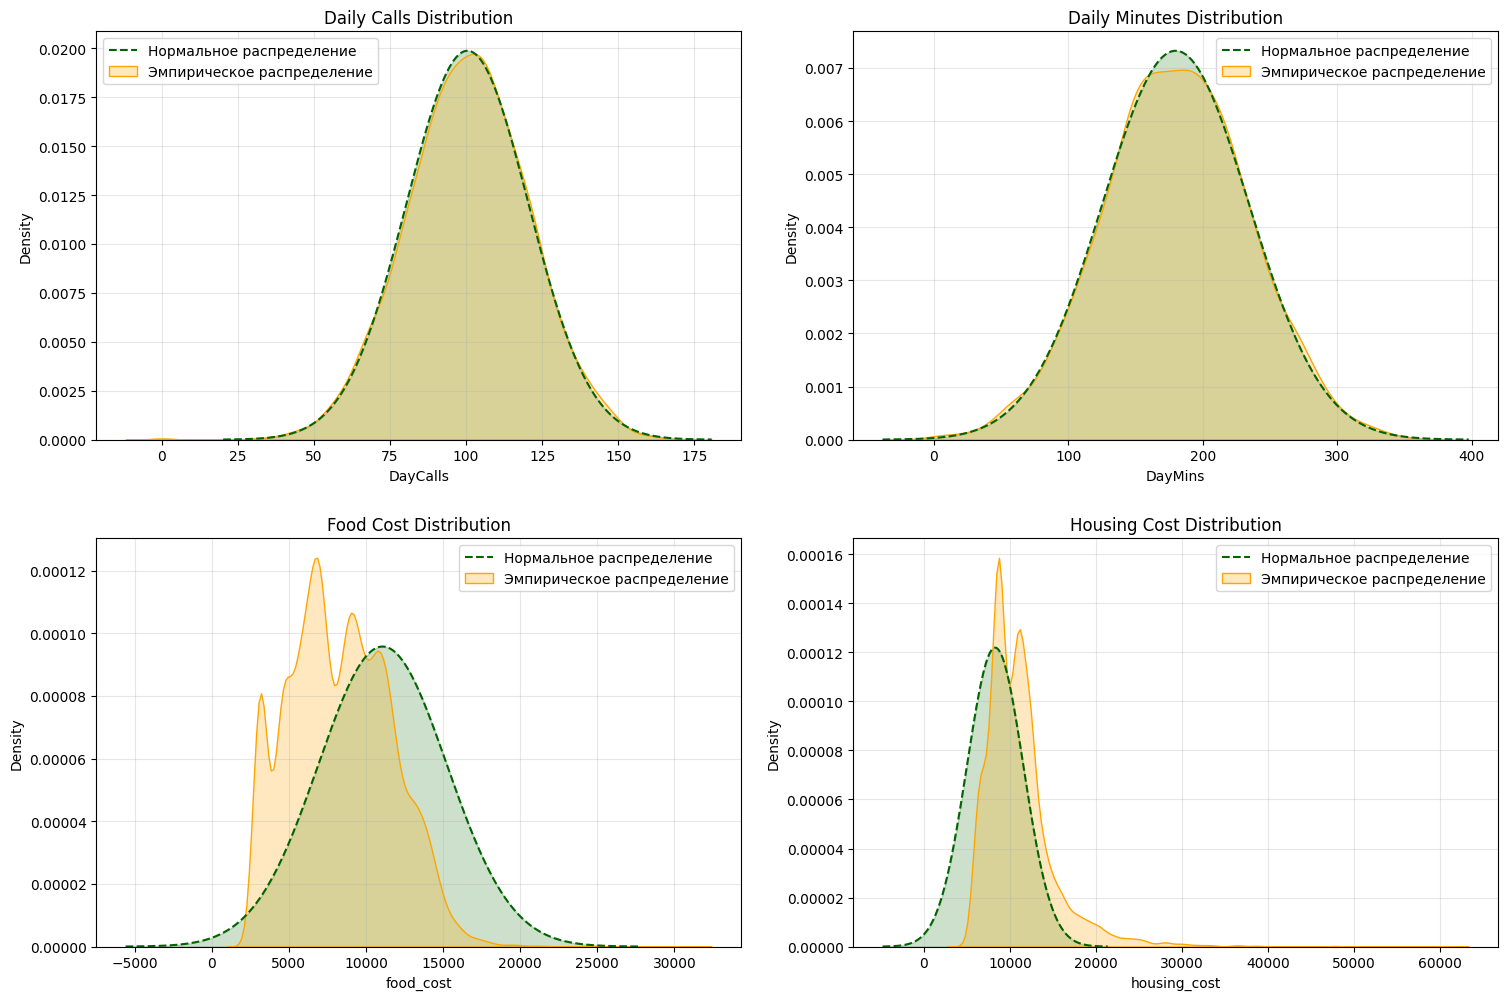

In [31]:
fig, axes = plot_distribution_comparison(
    data_1=data_1,
    data_2=data_2,
    information=information,
    figsize=(15, 10),
    normal_color='darkgreen',
    data_color='orange',
    alpha=0.2,
    n_points=200,
    sigma_range=4,
    titles=[
        'Daily Calls Distribution',
        'Daily Minutes Distribution',
        'Food Cost Distribution',
        'Housing Cost Distribution'
    ]
)

plt.show()

# Выводы

На сравнительных диаграммах наглядно видно, что признаки DayCalls и DayMins практически идентичны нормальному распределению с соответствующими параметрами, а графики распределений признаков food_cost и housing_cost хоть и можно очень условно принять за нормальное распределение, но они очень сильно отличаются от нормального распределения с соответствующими параметрами.